Obs: Os arquivos presentes na pasta "Faulty files" são arquivos que geraram erro ao fazer a leitura dos mesmos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyspectra.readers.read_spc import read_spc_dir
from sklearn.model_selection import StratifiedGroupKFold, GridSearchCV, StratifiedGroupKFold
from sklearn.decomposition import PCA
from chemotools.scatter import MultiplicativeScatterCorrection
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from chemotools.baseline import LinearCorrection

def plot_spectra(df, title):
    f, ax =plt.subplots(1, figsize=(18,8))
    ax.plot(df.transpose())
    plt.xlabel("nm")
    plt.ylabel("Abs")
    plt.grid(True)
    plt.title(title)
    plt.savefig(title + '.png', bbox_inches='tight')

def ler_arquivo_txt(caminho_arquivo):
  """
  Função designada para ler o arquivo de texto que indica o nome dos arquivos e suas classes

  Argumentos:
    caminho_arquivo (str): O caminho para o arquivo de texto.

  Retorno:
    dict: Um dicionário onde as chaves são as strings de busca e os valores são listas de arquivos encontrados.
  """
  strings_busca = ['Bladder Cancer', 'GU Disease', 'GU Cancer', 'BCA Inactive', 'Healthy']
  nomes_encontrados = {}
  with open(caminho_arquivo, 'r') as arquivo:
    for linha in arquivo:
      nome = linha.strip().split('\t')[8]  # Nome da classe
      arquivo = linha.strip().split('\t')[1] # Nome do arquivo
      for string_busca in strings_busca:
        if nome == string_busca:
          if string_busca not in nomes_encontrados:
            nomes_encontrados[string_busca] = []
          nomes_encontrados[string_busca].append(arquivo + '_')

  return nomes_encontrados

def adicionar_coluna_y(dataframe, nomes_extraidos):
  """
  Função que adiciona uma coluna "y", "Classe" e "Id" no dataframe correspondendo a classificação de cada arquivo assim como a identificação de um paciente(id)

  Argumentos:
    dataframe (pandas.DataFrame): O dataframe a ser modificado.
    nomes_extraidos (list): Vetor contendo os nomes dos arquivosa serem buscados.

  Retorno:
    pandas.DataFrame: O dataframe modificado com a coluna "y".
  """
  arquivos_cancer = nomes_extraidos['Bladder Cancer']

  dataframe['y'] = 0
  for index, row in dataframe.iterrows():

    for classe in nomes_extraidos.keys():
      nome_arquivos = nomes_extraidos[classe]
      
      for nome in nome_arquivos:
          
          if nome in str(index):
            dataframe.loc[index, 'Id'] = nome[:-1]
            dataframe.loc[index, 'Classe'] = classe
            break
      
      if classe == 'Bladder Cancer':
        for nome in arquivos_cancer:
          if nome in str(index):
            dataframe.loc[index, 'y'] = 1
            break

  return dataframe

### Leitura e formatação dos dados

In [2]:
# Leitura das amostras
df_spc_raw, dict_spc_raw = read_spc_dir('BCA_Dataset')
# Truncamento do espectro
df_spc_raw = df_spc_raw.iloc[:,250:1951]

x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)

In [3]:
columns = []
for i in range(250, 1951):
    columns.append(float(i))

columns = np.array(columns)

df_spc_raw.columns = columns

In [4]:
nomes_arquivos = ler_arquivo_txt('00 - FieldData.txt')

df_full = adicionar_coluna_y(df_spc_raw, nomes_arquivos)

In [5]:
df_full

,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,...,1944.0,1945.0,1946.0,1947.0,1948.0,1949.0,1950.0,y,Id,Classe
BCA10_0001.spc,6705.379395,6676.649902,6648.149414,6619.648926,6607.366211,6597.464844,6584.123535,6564.310059,6544.496582,6538.714355,...,2320.662598,2309.427490,2298.050537,2300.507080,2302.481934,2303.710449,2293.197754,0,BCA10,GU Disease
BCA10_0002.spc,6748.331543,6718.492188,6689.595703,6660.699707,6647.330078,6636.240723,6625.286621,6614.587402,6603.888184,6601.020508,...,2355.475586,2351.231689,2337.798340,2327.971680,2321.036133,2318.578857,2320.348389,0,BCA10,GU Disease
BCA10_0003.spc,6702.141602,6679.280273,6652.363281,6625.446289,6606.459473,6588.636719,6574.111816,6565.790039,6557.468750,6547.510742,...,2322.784668,2311.840332,2295.189209,2304.401611,2309.759033,2309.144775,2299.606934,0,BCA10,GU Disease
BCA10_0004.spc,6708.569824,6680.023926,6642.419434,6604.814453,6584.113770,6565.895508,6556.062988,6562.006836,6567.951172,6572.265137,...,2317.463379,2311.000000,2310.911621,2306.612549,2306.409912,2312.552734,2311.182129,0,BCA10,GU Disease
BCA10_0005.spc,6699.188965,6670.704102,6639.828613,6608.953125,6596.020996,6585.723633,6578.037109,6575.263184,6572.489746,6569.714355,...,2322.308838,2323.181152,2330.949463,2328.492920,2323.385010,2314.170898,2293.213623,0,BCA10,GU Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BCA9_0006.spc,7307.283691,7282.955566,7270.288574,7257.621582,7233.897949,7208.550293,7193.788086,7198.939453,7204.090820,7210.550781,...,2469.231689,2469.586914,2474.886475,2469.358887,2460.457275,2446.328613,2440.651611,0,BCA9,GU Disease
BCA9_0007.spc,7309.188965,7293.473145,7294.660645,7295.848145,7287.711426,7278.206543,7262.235352,7234.100098,7205.965332,7208.836426,...,2466.325195,2463.782715,2471.050537,2473.507080,2472.590088,2466.447266,2468.287598,0,BCA9,GU Disease
BCA9_0008.spc,7331.331543,7303.068848,7278.130859,7253.192871,7233.423340,7214.412598,7205.713379,7216.412598,7227.111816,7234.224121,...,2486.138184,2479.825928,2468.735107,2455.837646,2452.819824,2465.105713,2460.955078,0,BCA9,GU Disease
BCA9_0009.spc,7355.997559,7322.172363,7300.004883,7277.837891,7255.660645,7233.481445,7222.851074,7233.946289,7245.041992,7247.326660,...,2487.325195,2478.804443,2476.659668,2460.076904,2453.373779,2461.973877,2457.424805,0,BCA9,GU Disease


### Separação dos dados de treino e teste

In [6]:
y = df_full.loc[:,['y']]
X = df_full.loc[:,250.0:1950.0]
classes = df_full.loc[:,'Classe']
ids = df_full.loc[:, 'Id']

groups = df_full['Id'].values

# Configurar o StratifiedGroupKFold para a divisão treino e teste
gkf = StratifiedGroupKFold(n_splits=3)  # Utilizando n_splits maior que 2 para maior flexibilidade

# Realizar a divisão inicial em treino e teste de 70/30
train_idx, test_idx = next(gkf.split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
groups_train, groups_test = groups[train_idx], groups[test_idx]

# Resultados da divisão
print("Tamanho do conjunto de treino:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))

# Verificando as proporções das classes
train_proportions = y_train.value_counts(normalize=True)
test_proportions = y_test.value_counts(normalize=True)

print("Proporções no treino:\n", train_proportions)
print("Proporções no teste:\n", test_proportions)

X_train_classes = classes.iloc[train_idx]
train_proportions_classes = X_train_classes.value_counts()

X_test_classes = classes.iloc[test_idx]
test_proportions_classes = X_test_classes.value_counts()

print("Proporções no treino:\n", train_proportions_classes)
print("Proporções no teste:\n", test_proportions_classes)

Tamanho do conjunto de treino: 365
Tamanho do conjunto de teste: 188
Proporções no treino:
 y
0    0.69863
1    0.30137
Name: proportion, dtype: float64
Proporções no teste:
 y
0    0.680851
1    0.319149
Name: proportion, dtype: float64
Proporções no treino:
 Classe
Bladder Cancer    110
GU Disease         96
BCA Inactive       69
GU Cancer          50
Healthy            40
Name: count, dtype: int64
Proporções no teste:
 Classe
GU Disease        60
Bladder Cancer    60
Healthy           30
GU Cancer         28
BCA Inactive      10
Name: count, dtype: int64


### Teste sem PCA

In [7]:
baseline = LinearCorrection()
XGBoost = XGBClassifier(objective="binary:logistic", device='cuda', random_state=53)
MSC = MultiplicativeScatterCorrection()
Scaler = StandardScaler()

pipeline = Pipeline(steps=[("Correction", MSC),
                           ("Scaling", Scaler),
                           ("Baseline", baseline),
                           ("XGBoost", XGBoost)])

param_grid = {
             "XGBoost__gamma": [3, 4],
              "XGBoost__max_depth": [2, 3],
              "XGBoost__n_estimators": [100, 200],
              "XGBoost__min_child_weight": [0.3, 0.5],
              "XGBoost__subsample": [0.1, 0.3]
              }

inner_skf = StratifiedGroupKFold(n_splits=5)

search = GridSearchCV(pipeline, param_grid=param_grid, scoring='balanced_accuracy', cv=inner_skf)

search.fit(X_train, y_train, groups=groups_train)

# Resultados da busca de hiperparâmetros
print("Melhores parâmetros encontrados: ", search.best_params_)
print("Melhor acurácia na validação: ", search.best_score_)

c:\Users\filip\miniconda3\envs\t1\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:51:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Melhores parâmetros encontrados:  {'XGBoost__gamma': 4, 'XGBoost__max_depth': 2, 'XGBoost__min_child_weight': 0.5, 'XGBoost__n_estimators': 200, 'XGBoost__subsample': 0.1}
Melhor acurácia na validação:  0.6078163265306122


acc: 0.6329787234042553
bacc: 0.6375
f1: 0.6450481335338185
precision: 0.6823547358404219
recall: 0.6329787234042553


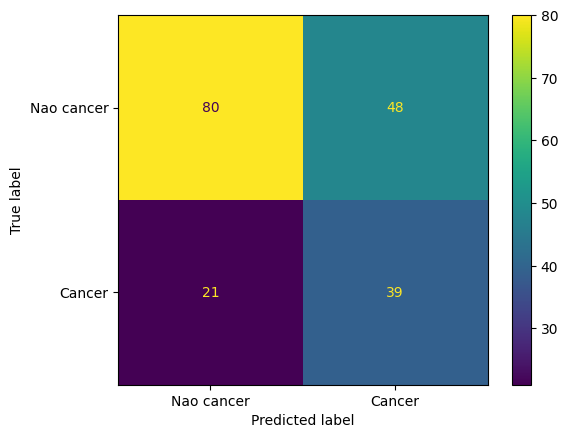

In [8]:
# Avaliar o modelo no conjunto de teste
best_model = search.best_estimator_
pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
bac = balanced_accuracy_score(y_test, pred)
recall = recall_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted', zero_division=True)
f1 = f1_score(y_test, pred, average='weighted')

print(f'acc: {accuracy}')
print(f'bacc: {bac}')
print(f'f1: {f1}')
print(f'precision: {precision}')
print(f'recall: {recall}')

cm = confusion_matrix(y_test, pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Nao cancer", "Cancer"])
cm_display.plot()
plt.savefig('CM')
plt.show()

### Verificação para escolha do número de componentes principais

In [9]:
MSC2 = MultiplicativeScatterCorrection()
Scaler2 = StandardScaler()
X_train_temp = MSC2.fit_transform(X_train.copy())
X_train_temp2 = Scaler2.fit_transform(X_train_temp)
pca = PCA(n_components=22)
pca.fit(X_train_temp2)

# Print the results
print('***** PCA Summary *****')
print('No. of features: ', pca.n_features_in_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)

# 5 componentes são suficientes

***** PCA Summary *****
No. of features:  1701
No. of samples:  365
No. of components:  22
Explained variance ratio:  [6.20964376e-01 3.51207656e-01 1.14914184e-02 6.89620515e-03
 3.17582420e-03 1.39801646e-03 8.37244770e-04 5.24955458e-04
 2.67955752e-04 1.46111702e-04 1.26332810e-04 1.18998771e-04
 8.09176294e-05 6.93446375e-05 6.54362797e-05 6.23394434e-05
 5.66385914e-05 5.47828595e-05 5.29654743e-05 5.17941359e-05
 4.90497361e-05 4.63812165e-05]


### Teste com PCA

In [10]:
XGBoost2 = XGBClassifier(objective="binary:logistic", device='cuda', random_state=53)
MSC2 = MultiplicativeScatterCorrection()
Scaler2 = StandardScaler()
pca = PCA(n_components=5)

pipeline2 = Pipeline(steps=[("Correction", MSC2),
                            ("Scaling", Scaler2),
                            ("PCA", pca),
                            ("XGBoost", XGBoost2)])

param_grid2 = {"XGBoost__gamma": [3, 4],
               "XGBoost__max_depth": [2, 3],
               "XGBoost__n_estimators": [100, 200],
               "XGBoost__min_child_weight": [0.1, 0.3],
               "XGBoost__subsample": [0.1, 0.3]}

inner_skf = StratifiedGroupKFold(n_splits=5)

search2 = GridSearchCV(pipeline2, param_grid=param_grid2, scoring='balanced_accuracy', cv=inner_skf)

search2.fit(X_train, y_train, groups=groups_train)

# Resultados da busca de hiperparâmetros
print("Melhores parâmetros encontrados: ", search2.best_params_)
print("Melhor acurácia na validação: ", search2.best_score_)

# Avaliar o modelo no conjunto de teste
best_model2 = search2.best_estimator_
pred2 = best_model2.predict(X_test)

Melhores parâmetros encontrados:  {'XGBoost__gamma': 4, 'XGBoost__max_depth': 2, 'XGBoost__min_child_weight': 0.1, 'XGBoost__n_estimators': 100, 'XGBoost__subsample': 0.3}
Melhor acurácia na validação:  0.5909727891156462


acc: 0.7127659574468085
bacc: 0.7049479166666667
f1: 0.7200876095118899
precision: 0.7375219964805632
recall: 0.7127659574468085


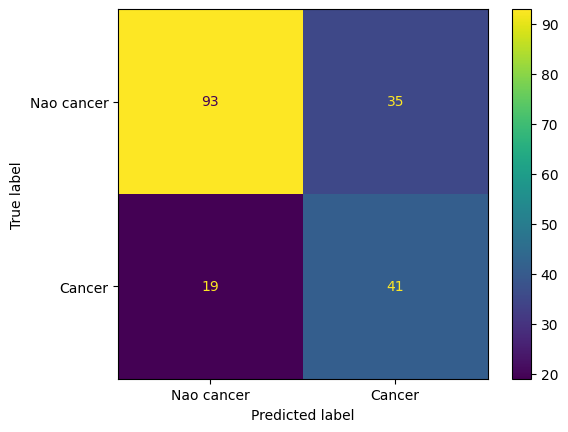

In [11]:
accuracy2 = accuracy_score(y_test, pred2)
bac2 = balanced_accuracy_score(y_test, pred2)
recall2 = recall_score(y_test, pred2, average='weighted')
precision2 = precision_score(y_test, pred2, average='weighted', zero_division=True)
f12 = f1_score(y_test, pred2, average='weighted')

print(f'acc: {accuracy2}')
print(f'bacc: {bac2}')
print(f'f1: {f12}')
print(f'precision: {precision2}')
print(f'recall: {recall2}')

cm2 = confusion_matrix(y_test, pred2)

cm_display2 = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = ["Nao cancer", "Cancer"])
cm_display2.plot()
plt.savefig('CM_pca')
plt.show()